In [68]:
import scipy.stats as sps
import numpy as np
import random
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

A = 4
B = 8
N = 200

Смоделируйте две выборки - первая из биномиального распределения с [a/2] испытаниями и вероятностью a/(a+b), вторая из биномиального распределения с [b/2] испытаниями и вероятностью b/(a+b) (возьмите n, достаточно большое для применимости критерия Пирсона):

In [69]:
x = np.random.binomial(A/2, A/(A+B), size = N)
y = np.random.binomial(B/2, B/(A+B), size = N)

print(x)
print('--------------------------------------------------------------------------')
print(y)

[0 1 0 1 0 1 0 0 2 0 1 1 2 1 0 0 0 2 0 0 0 0 1 2 0 0 1 2 2 0 2 1 1 2 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 2 1 2 1 0 2 0 1 0 1 0 1 0 1 1 0
 0 1 2 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 2 0 1 1 0 0 0 0 1 2 0 0 2 1 0 1
 1 0 0 0 1 0 2 0 1 1 2 0 1 0 2 1 0 1 0 2 1 0 0 1 1 2 0 1 0 0 0 0 1 0 1 1 1
 0 1 0 0 1 0 0 1 2 2 1 2 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 2 1 2 1
 0 0 1 1 1 1 0 1 2 0 1 0 0 1 2]
--------------------------------------------------------------------------
[2 3 2 2 3 2 2 2 1 4 3 2 4 2 3 1 4 3 2 3 3 2 2 3 4 4 2 3 3 4 2 2 3 1 3 2 0
 1 3 3 2 4 3 2 4 2 4 3 4 2 1 3 1 2 3 3 1 3 4 3 3 3 3 3 2 4 4 3 1 3 2 3 3 4
 2 2 4 2 4 2 2 2 4 2 2 4 3 2 3 2 2 2 3 3 3 2 3 3 4 1 2 2 2 1 3 2 3 2 1 2 4
 2 1 3 2 1 2 2 3 3 2 4 2 4 1 4 3 4 3 2 4 2 2 1 4 3 2 1 3 3 4 2 2 4 4 4 2 3
 2 3 1 4 3 2 4 4 2 3 3 4 3 2 3 3 2 4 2 3 3 2 0 0 4 1 4 4 3 3 3 3 4 4 3 0 1
 4 3 4 3 2 4 2 2 3 2 1 3 2 2 3]


Построим двумерную выборку из двух смоделированных выборок (x1,y1), (x2,y2),...,(xn,yn):

In [70]:
xy = [[],[]]
for i in range(N):
    xy[0].append(x[i])
    xy[1].append(y[i])

print(xy)

[[0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2], [2, 3, 2, 2, 3, 2, 2, 2, 1, 4, 3, 2, 4, 2, 3, 1, 4, 3, 2, 3, 3, 2, 2, 3, 4, 4, 2, 3, 3, 4, 2, 2, 3, 1, 3, 2, 0, 1, 3, 3, 2, 4, 3, 2, 4, 2, 4, 3, 4, 2, 1, 3, 1, 2, 3, 3, 1, 3, 4, 3, 3, 3, 3, 3, 2, 4, 4, 3, 1, 3, 2, 3, 3, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 4, 1, 2, 2, 2, 1, 3, 2, 3, 2, 1, 2, 4, 2, 1, 3, 2, 1, 2, 2, 3, 3, 2, 4, 2, 4, 1, 4, 3, 4, 3, 2, 4, 2, 

In [71]:
import pandas as pd
import math

r = A/2 + 1
s = B/2 + 1
print(r, s)

df = pd.DataFrame({'X' : xy[0],
                  'Y' : xy[1]})

df = pd.crosstab(df.Y, df.X, margins=True)
print(df)

hi2_statistic = 0

for i in range(int(r)):
    for j in range(int(s)):
        hi2_statistic += ((df[i][j] - (df.All[j]*df[i].All/df.All.All)) ** 2) / (df.All[j]*df[i].All/df.All.All)

print('HI2 STATISTIC: ',hi2_statistic)

y2_statistic = 0

for i in range(int(r)):
    for j in range(int(s)):
        y2_statistic += df[i][j] * np.log((df[i][j]) / (df.All[j]*df[i].All/df.All.All))

y2_statistic = 2 * y2_statistic

print('Y2 STATISTIC: ',y2_statistic)

degree = (r-1)*(s-1)

critical_value = 15.51 #критич знач по таблице 5%-ная ошибка

print('Критич знач ', critical_value)

if(hi2_statistic < critical_value):
    print('Принимаем')
else :
    print('Отвергаем')



3.0 5.0
X     0   1   2  All
Y                   
0     2   1   1    4
1    11   7   2   20
2    37  24   6   67
3    24  32  10   66
4    20  15   8   43
All  94  79  27  200
HI2 STATISTIC:  7.522607105260701
Y2 STATISTIC:  7.537967065584902
Критич знач  15.51
Принимаем


В качестве каких-то реальных данных я нашла в интернете две таблицы сопряженности, которые отражают взаимосвязь удовлетворенности человека жизнью и его личной самооценки относительно того, насколько он богат (табл1) и насколько высок его социальный статус (табл2):

<function matplotlib.pyplot.show(close=None, block=None)>

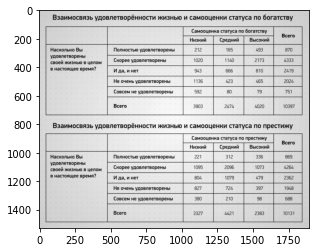

In [72]:
from matplotlib import pyplot as plt

img = plt.imread("images/table.png")
plt.imshow(img)
plt.show

Составим соответствующие таблицы оспряженности и проверим гипотезы:
1) Связана ли удовлетворенность жизнью с самооценкой по богатству?
2) Связана ли удовлетворенность жизнью с самооценкой по престижу?

In [74]:
df[0][0] = 212
df[1][0] = 165
df[2][0] = 493
df.All[0] = 870
df[0][1] = 1020
df[1][1] = 1140
df[2][1] = 2173
df.All[1] = 4333
df[0][2] = 943
df[1][2] = 666
df[2][2] = 810
df.All[2] = 2419
df[0][3] = 1136
df[1][3] = 423
df[2][3] = 465
df.All[3] = 2024
df[0][4] = 592
df[1][4] = 80
df[2][4] = 79
df.All[4] = 751
print(df)

X       0     1     2   All
Y                          
0     212   165   493   870
1    1020  1140  2173  4333
2     943   666   810  2419
3    1136   423   465  2024
4     592    80    79   751
All    94    79    27   200


Проверка гипотезы:

In [75]:
hi2_statistic = 0

for i in range(int(r)):
    for j in range(int(s)):
        hi2_statistic += ((df[i][j] - (df.All[j]*df[i].All/df.All.All)) ** 2) / (df.All[j]*df[i].All/df.All.All)

print('HI2 STATISTIC: ',hi2_statistic)

y2_statistic = 0

for i in range(int(r)):
    for j in range(int(s)):
        y2_statistic += df[i][j] * np.log((df[i][j]) / (df.All[j]*df[i].All/df.All.All))

y2_statistic = 2 * y2_statistic

print('Y2 STATISTIC: ',y2_statistic)

degree = (r-1)*(s-1)

critical_value = 15.51 #критич знач по таблице 5%-ная ошибка

print('Критич знач ', critical_value)

if(hi2_statistic < critical_value):
    print('Принимаем')
else :
    print('Отвергаем')

HI2 STATISTIC:  7907.227350383186
Y2 STATISTIC:  5620.5181389067275
Критич знач  15.51
Отвергаем


Мы отвергли гипотезу H0 о том, что признаки не связаны и приняли альтернативную гипотезу H1 о том, что взаимосвязь между признаками есть.

Вторая таблица

In [76]:
df[0][0] = 221
df[1][0] = 312
df[2][0] = 336
df.All[0] = 869
df[0][1] = 1095
df[1][1] = 2096
df[2][1] = 1073
df.All[1] = 4264
df[0][2] = 804
df[1][2] = 1079
df[2][2] = 479
df.All[2] = 2362
df[0][3] = 827
df[1][3] = 724
df[2][3] = 397
df.All[3] = 1948
df[0][4] = 380
df[1][4] = 210
df[2][4] = 98
df.All[4] = 688
print(df)

X       0     1     2   All
Y                          
0     221   312   336   869
1    1095  2096  1073  4264
2     804  1079   479  2362
3     827   724   397  1948
4     380   210    98   688
All    94    79    27   200


In [77]:
hi2_statistic = 0

for i in range(int(r)):
    for j in range(int(s)):
        hi2_statistic += ((df[i][j] - (df.All[j]*df[i].All/df.All.All)) ** 2) / (df.All[j]*df[i].All/df.All.All)

print('HI2 STATISTIC: ',hi2_statistic)

y2_statistic = 0

for i in range(int(r)):
    for j in range(int(s)):
        y2_statistic += df[i][j] * np.log((df[i][j]) / (df.All[j]*df[i].All/df.All.All))

y2_statistic = 2 * y2_statistic

print('Y2 STATISTIC: ',y2_statistic)

degree = (r-1)*(s-1)

critical_value = 15.51 #критич знач по таблице 5%-ная ошибка

print('Критич знач ', critical_value)

if(hi2_statistic < critical_value):
    print('Принимаем')
else :
    print('Отвергаем')

HI2 STATISTIC:  1730.72457348265
Y2 STATISTIC:  1585.7749493538374
Критич знач  15.51
Отвергаем


Мы отвергли гипотезу H0 о том, что признаки не связаны и приняли альтернативную гипотезу H1 о том, что взаимосвязь между признаками есть.